In [0]:
# Import tensorflow
%tensorflow_version 2.x
import tensorflow as tf

TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
# additional imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [0]:
# Load in the data
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# I'd like to have my data centered around 0 or .5, so i'll divide the pixels by 255
x_train, x_test = x_train / 255.0, x_test / 255.0
print('x_train.shape:',x_train.shape)

4423680/4422102 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [0]:
# The data is only 2D (28x28, Height x Width) since the images are in grayscale
# Convolutional neural network expects extra feature map dimension
# In this case, that dimension is colors of images
# So we need to expand the dimensions
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [0]:
# Number of classes is 10, but hardcoding it (writing by hand) is not 
# that convenient in daily life, so use another variable for it.
K = len(set(y_test))
print('Number of classes:', K)

Number of classes: 10


In [0]:
# I'll build the model using the functional keras API
# that lets me create more complex models
i = Input(shape = x_train[0].shape) # Input isn't (X,). It's HxWxC so 28x28x1
# we can just pass without flatten it
# Convolutional layers
# first parameters is the number of filters we would have,
# second one is the size of filter ( 3x3, 5x5 or 7x7 are being used in general), it converts the image to feature vector
# and it stays constant most of the time (***) NOTE: Googles imagenet model architecture uses different filter size to reduce the total calculated parameters
# third parameters is how much stride we'd have. How much the 
# image dimensions get reduced by is up to you, 2 is generally more convenient
# also 2 means that dimensions get reduced by half
# we already know what activation parameter is
# also there's padding parameter which allows us to select the
# convolution mode, defualt is 'valid' and there are 2 more options such as
# 'same' and 'full'. 
# be careful! we're passing the output of input layer to Conv2D layer
# just like the Sequential model but more manually.
x = Conv2D(32, (3, 3), strides = 2, activation = 'relu')(i) # (***) filter size stays constant
x = Conv2D(64, (3, 3), strides = 2, activation = 'relu')(x) # passing the output of first Conv2D layer | (***) filter size stays constant
x = Conv2D(128, (3, 3), strides = 2, activation = 'relu')(x) # passing the output of 2nd conv2d layer |(***) filter size stays constant
x = Flatten()(x) # Flatten the data so we can pass it to Dense layer
x = Dropout(.2)(x) # WARNING: Using dropout may be inconvenient since our filters are looking for features from smaller to bigger. What if it drops out an important feature?
x = Dense(512, activation = 'relu')(x)
x = Dropout(.2)(x) # Same description as first Dropout layer
x = Dense(K, activation = 'softmax')(x) # We have K number of classes (K=10)
# Also we use softmax activation function because we have K>2 classes

# a model can have more inputs and outputs than 1
model = Model(i, x) # pass the input and output of the last layer

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
# Compile and fit the model
# Note: make sure you are using the GPU for this process
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 15)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 13s 224us/sample - loss: 0.5278 - acc: 0.8050 - val_loss: 0.4080 - val_acc: 0.8426
Epoch 2/15
60000/60000 [==============================] - 7s 109us/sample - loss: 0.3677 - acc: 0.8616 - val_loss: 0.3713 - val_acc: 0.8594
Epoch 3/15
60000/60000 [==============================] - 6s 108us/sample - loss: 0.3206 - acc: 0.8802 - val_loss: 0.3346 - val_acc: 0.8781
Epoch 4/15
60000/60000 [==============================] - 7s 108us/sample - loss: 0.2891 - acc: 0.8903 - val_loss: 0.3279 - val_acc: 0.8823
Epoch 5/15
60000/60000 [==============================] - 7s 109us/sample - loss: 0.2619 - acc: 0.9008 - val_loss: 0.2988 - val_acc: 0.8905
Epoch 6/15
60000/60000 [==============================] - 7s 109us/sample - loss: 0.2395 - acc: 0.9097 - val_loss: 0.3086 - val_acc: 0.8925
Epoch 7/15
60000/60000 [==============================] - 6s 108us/sample - loss: 0.2209 - acc: 0.9162 - val_

[]

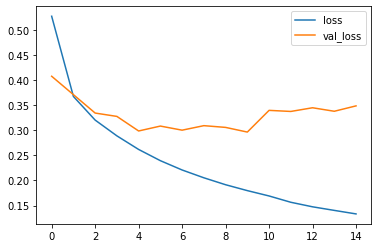

In [0]:
# Let's plot the results!
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.plot()
# We may say that the model is overfitting a little bit since
# the loss of validation_data is higher in the last periods

[]

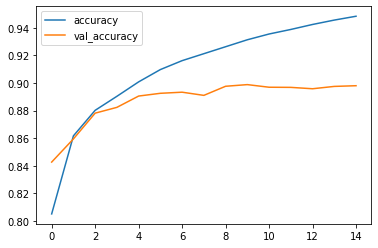

In [0]:
# Plot the accuracy
plt.plot(r.history['acc'], label = 'accuracy')
plt.plot(r.history['val_acc'], label = 'val_accuracy')
plt.legend()
plt.plot()
# It's interesting to have a kinda steady accuracy on validation data
# because the loss of validation_data goes higher and higher on the loss graph
# this could mean is that the model is becoming more and more confident
# in its incorrect predictions

Confusion matrix, without normalization
[[854   1  28  11   3   0  95   0   8   0]
 [  6 974   0   9   3   0   5   0   3   0]
 [ 14   0 857   9  56   0  60   0   4   0]
 [ 11   4  26 896  28   0  33   0   2   0]
 [  1   2  78  28 810   0  79   0   2   0]
 [  0   0   0   2   0 969   0  18   1  10]
 [106   1  70  19  77   0 711   0  16   0]
 [  0   0   0   0   0  11   0 956   1  32]
 [  3   1   2   2   5   1   1   2 983   0]
 [  1   0   0   0   0   6   0  23   0 970]]


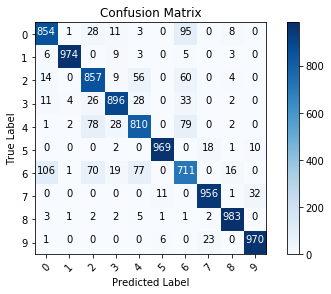

In [0]:
# Plot confusion matrix
# Code source: 
# https://colab.research.google.com/drive/11OHqNJQhT7rnNc2rmv7bs8uICkncgqWm

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion Matrix',
                          cmap = plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize=True'.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Confusion matrix, without normalization')
  print(cm)

  plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment='center',
             color = 'white' if cm[i, j] > thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

p_test = model.predict(x_test).argmax(axis = 1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


In [0]:
# Label mapping
labels = ''' T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot
'''.split()

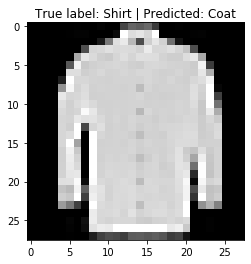

In [0]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap = 'gray')
plt.title('True label: %s | Predicted: %s' % (labels[y_test[i]], labels[p_test[i]]));